### What is the change in pct of divorced danes from 2008 to 2020?

In [2]:
import matplotlib.pyplot as plt
import csv
import pandas as pd 

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&CIVILSTAND=F&Tid=2008K4%2C2020K1'
dst = pd.read_csv(url, delimiter=";")

print((dst['INDHOLD'][1] - dst['INDHOLD'][0]) / dst['INDHOLD'][0] * 100)

26.016531067484888


### Which of the 5 biggest cities has the highest percentage of 'Never Married'?

In [8]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&Tid=2020K1&CIVILSTAND=TOT%2CU&K%C3%98N=TOT&OMR%C3%85DE=101%2C851%2C561%2C461%2C751&ALDER=IALT'
data = pd.read_csv(url, delimiter=";")

not_married_pct = {data['OMRÅDE'][not_married][4:]:data['INDHOLD'][not_married]/data['INDHOLD'][all_people]*100 for not_married, all_people in zip(range(5,10),range(0,5))}
not_married_pct

result = {}
for not_married, all_people in zip(range(5,10),range(0,5)):
    pct_not_married = data['INDHOLD'][not_married]/data['INDHOLD'][all_people]*100
    city = data['OMRÅDE'][not_married][4:]
    result[city] = pct_not_married
result

{'København': 65.23579087199924,
 'Aalborg': 54.448462512956354,
 'Esbjerg': 47.63818051141727,
 'Odense': 54.90129090509773,
 'Aarhus': 59.576893734838556}

### Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

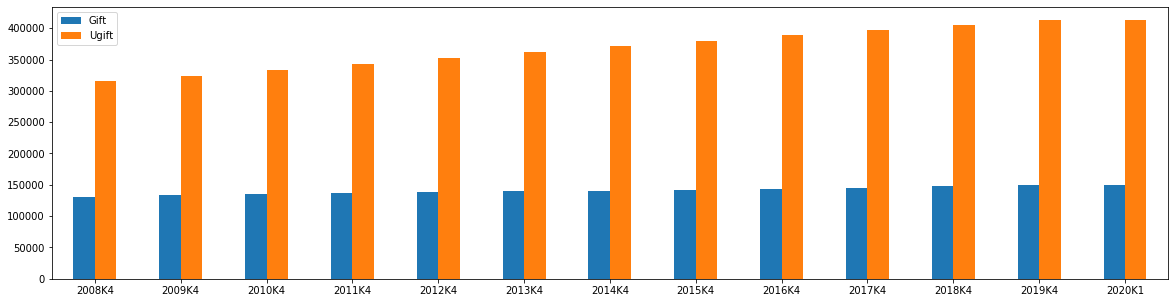

In [189]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&OMR%C3%85DE=101&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'
dst = pd.read_csv(url, delimiter=";")

def getDataMarried():
    gift = []
    for index, row in dst.iterrows():
        if row['CIVILSTAND'] == "Ugift":
            continue
        gift.append(row['INDHOLD'])
    return gift

def getDataUnmarried():
    ugift = []
    for index, row in dst.iterrows():
        if row['CIVILSTAND'] == "Gift/separeret":
            continue
        ugift.append(row['INDHOLD'])
    return ugift

def getIndex():
    indexes = []
    iterator = dst.drop_duplicates('TID')
    for index, row in iterator.iterrows():
        indexes.append(row['TID'])
    return indexes

gift = getDataMarried()
ugift = getDataUnmarried()
index = getIndex()

df = pd.DataFrame({'Gift' : gift, 'Ugift' : ugift}, index = index)
df.plot.bar(rot=0, figsize=(20, 5))

### Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

<BarContainer object of 126 artists>

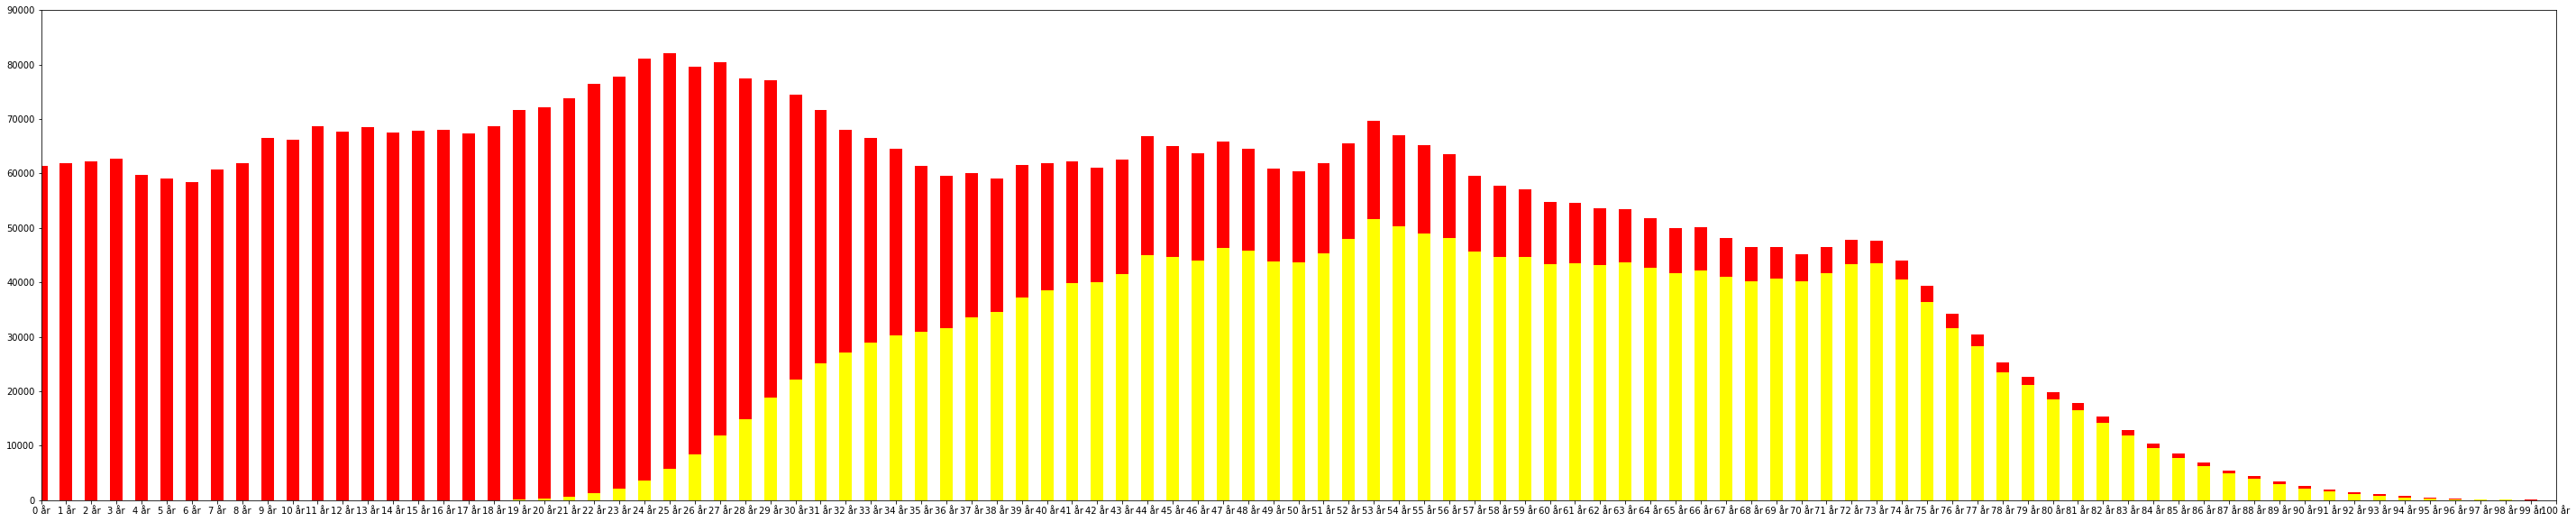

In [223]:
import matplotlib.pyplot as plt
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=U%2CG'
dst = pd.read_csv(url, delimiter=";")

def getDataMarried():
    married = []
    for index, row in dst.iterrows():
        if (row['CIVILSTAND'] == "Ugift") or (row['ALDER'] == "I alt"):
            continue
        married.append(row['INDHOLD'])
    return married


def getDataUnMarried():
    unmarried = []
    for index, row in dst.iterrows():
        if (row['CIVILSTAND'] == "Gift/separeret") or (row['ALDER'] == "I alt"):
            continue
        unmarried.append(row['INDHOLD'])
    return unmarried

def getIndex():
    indexes = []
    iterator = dst.drop_duplicates('ALDER')
    for index, row in iterator.iterrows():
        if row['ALDER'] == "I alt":
            continue
        indexes.append(row['ALDER'])
    return indexes

married = getDataMarried()
unmarried = getDataUnMarried()
indexes = getIndex()


plt.figure(figsize=(50, 10))
plt.axis([0, 100, 0, 90000])
plt.bar(indexes, unmarried, width=0.5, linewidth=0, align='center', color='red', bottom = married)
plt.bar(indexes, married, width=0.5, linewidth=0, align='center', color='yellow')

## Eksersize 2:

### Choose any of the other tables in 'databanken' to find interesting data.

1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots
